In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import glob

# Super Mario Bros

        Steps  MeanReward  MeanScore  RewardCumSum  ScoreCumSum
0        5000    0.000000      90.00      0.000000        90.00
4       10000    0.025000      30.00      0.025000       120.00
8       15000    0.000000       5.00      0.025000       125.00
15      20000    0.100000      70.00      0.125000       195.00
16      25000    0.050000      25.00      0.175000       220.00
...       ...         ...        ...           ...          ...
1573  1980000    0.150000    1381.25     36.400000    289387.50
1590  1985000    0.103125     898.75     36.503125    290286.25
1581  1990000    0.028125    1778.75     36.531250    292065.00
1594  1995000    0.103125     891.25     36.634375    292956.25
1598  2000000    0.225000     480.00     36.859375    293436.25

[1200 rows x 5 columns]


'\n\nfig1,ax1 = plt.subplots()\nfig2,ax2 = plt.subplots()\n\nfor index, item in enumerate(mario_a3c_train_means):\n    ax1.plot(item[\'Steps\'],item[\'RewardCumSum\'],label=("Run {}".format(index+1)))\nax1.set_xlabel("Timesteps")\nax1.set_ylabel("Reward")\nax1.legend(loc=\'best\')\nax1.set_title(\'Super Mario Bros - A3C\')\nfig1.savefig(\'SMB_A3C_REWARD.pdf\')\n\nfor index, item in enumerate(mario_a3c_train_means):\n    ax2.plot(item[\'Steps\'],item[\'ScoreCumSum\'],label=("Run {}".format(index+1)))\nax2.set_xlabel("Timesteps")\nax2.set_ylabel("Score")\nax2.legend(loc=\'best\')\nax2.set_title(\'Super Mario Bros - A3C\')\n\nfig2.savefig(\'SMB_A3C_SCORE.pdf\')\n'

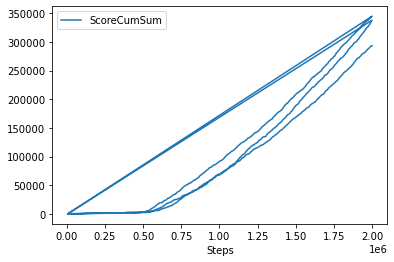

In [34]:
#A3C
files = (glob.glob('csv/mario/a3c/*.csv'))

mario_a3c_train =[]
for i in range(3):
    mario_a3c_train.append(pd.read_csv(files[i],index_col=False))

for i in range(3):
    mario_a3c_train[i] = mario_a3c_train[i].sort_values(by = 'Steps')
    mario_a3c_train[i]['MeanReward'] = mario_a3c_train[i].groupby('Steps')['Reward'].transform('mean')
    mario_a3c_train[i]['MeanScore'] = mario_a3c_train[i].groupby('Steps')['Score'].transform('mean')
    mario_a3c_train[i]['RewardCumSum'] = mario_a3c_train[i][['MeanReward']].cumsum()
    mario_a3c_train[i]['ScoreCumSum'] = mario_a3c_train[i][['MeanScore']].cumsum()
mario_a3c_train_means = []
for i in range(3): 
    new_df = mario_a3c_train[i][['Steps','MeanReward','MeanScore']].copy()
    new_df = new_df.drop_duplicates()
    new_df['RewardCumSum'] = new_df[['MeanReward']].cumsum()
    new_df['ScoreCumSum'] = new_df[['MeanScore']].cumsum()

    mario_a3c_train_means.append(new_df)

#print(mario_a3c_train_means[1])

df_concat = pd.concat((mario_a3c_train_means[0],mario_a3c_train_means[1],mario_a3c_train_means[2]))

by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()
df_means = df_means.groupby('Steps')
print(df_concat)

df_concat.plot(x='Steps',y='ScoreCumSum')
'''
for i in range(3):
    mario_a3c_train[i] = mario_a3c_train[i].iloc[::4]
'''
'''

fig1,ax1 = plt.subplots()
fig2,ax2 = plt.subplots()

for index, item in enumerate(mario_a3c_train_means):
    ax1.plot(item['Steps'],item['RewardCumSum'],label=("Run {}".format(index+1)))
ax1.set_xlabel("Timesteps")
ax1.set_ylabel("Reward")
ax1.legend(loc='best')
ax1.set_title('Super Mario Bros - A3C')
fig1.savefig('SMB_A3C_REWARD.pdf')

for index, item in enumerate(mario_a3c_train_means):
    ax2.plot(item['Steps'],item['ScoreCumSum'],label=("Run {}".format(index+1)))
ax2.set_xlabel("Timesteps")
ax2.set_ylabel("Score")
ax2.legend(loc='best')
ax2.set_title('Super Mario Bros - A3C')

fig2.savefig('SMB_A3C_SCORE.pdf')
'''


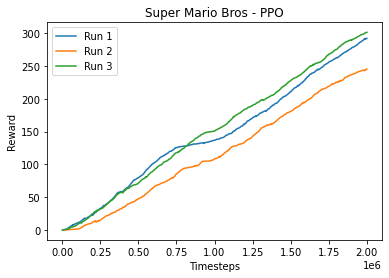

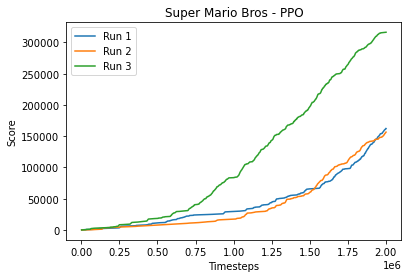

In [18]:
#PPO 
files = (glob.glob('csv/mario/ppo/*.csv'))

mario_ppo_train =[]
for i in range(3):
    mario_ppo_train.append(pd.read_csv(files[i],index_col=False))

for i in range(3):
    mario_ppo_train[i]['MeanReward'] = mario_ppo_train[i][['Reward1','Reward2','Reward3','Reward4']].mean(axis=1)
    mario_ppo_train[i]['MeanScore'] = mario_ppo_train[i][['Score1','Score2','Score3','Score4']].mean(axis=1)


    mario_ppo_train[i]['RewardCumSum'] = mario_ppo_train[i][['MeanReward']].cumsum()
    mario_ppo_train[i]['ScoreCumSum'] = mario_ppo_train[i][['MeanScore']].cumsum()
fig1,ax1 = plt.subplots()
fig2,ax2 = plt.subplots()

for index, item in enumerate(mario_ppo_train):
    ax1.plot(item['Steps'],item['RewardCumSum'],label=("Run {}".format(index+1)))
ax1.set_xlabel("Timesteps")
ax1.set_ylabel("Reward")
ax1.legend(loc='best')
ax1.set_title('Super Mario Bros - PPO')
fig1.savefig('SMB_PPO_REWARD.pdf')

for index, item in enumerate(mario_ppo_train):
    ax2.plot(item['Steps'],item['ScoreCumSum'],label=("Run {}".format(index+1)))
ax2.set_xlabel("Timesteps")
ax2.set_ylabel("Score")
ax2.legend(loc='best')
ax2.set_title('Super Mario Bros - PPO')

fig2.savefig('SMB_PPO_SCORE.pdf')

# Save